In [1]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "import functions")

## 4.1 Principal component analysis

In the [intro](dim_red_intro.ipynb) we mentioned that in certain datasets, it might be useful to (i) discard low variance, uninformative features of the data to simplify the problem and model or to (ii) find the directions of highest variance to determine the most descriptive features of the data. These two goals point at two correpsonding approaches for dimensionality reduction, which turn out to be equivalent. The first amounts to a basis rotation and disposal of some dimensions, picked such that the sum-of-squares error from the original data is minimised $-$ this is the formulation of reconstruction error minimisation. In the second approach, we discard a number of directions along which the data variance is low, retaining only directions of high variance $-$ this is the formulation of variance maximisation. When using a sum-of-squares as the reconstruction error, the minimum error and maximum variance approaches are equivalent and are really the same method (which we will show later), called **principal component analysis** or PCA.

Starting with error minimisation, suppose $\{\mathbf{u}_d\}^D_{d = 1}$ is a complete *orthonormal* basis, with which we can express any datapoint $\mathbf{x}_n$ as a linear combination of these vectors:

\begin{align}
\mathbf{x}_n &= \sum^D_{d = 1} a_{nd} \mathbf{u}_d\\
\end{align}

Where $D$ is the number of dimensions in the dataset. Now let's take $M < D$ to be the number of dimensions we are reducing to (therefore $D-M$ is the number of dimensions we are removing ). We can now write:

\begin{align}
\mathbf{x}_n =  \sum^M_{d = 1} a_{nd} \mathbf{u}_d + \sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\\
\end{align}

The first sum here represents the orthogonal projection of the original datapoint onto the lower-dimensional subspace (as this can be expressed by the first $M$  basis vectors), and the second sum represents the vector between the original datapoint and the new datapoint. Taking the first sum as our approximation $\mathbf{x}_n^\star$ of $\mathbf{x}_n$ in our lower dimensional space we have:

\begin{align}
\mathbf{x}_n^\star =  \sum^M_{d = 1} a_{nd} \mathbf{u}_d\\
\end{align}

Our mean squared reconstruction error is simply the mean Euclidean distance between each $\mathbf{x}_n$ and $\mathbf{x}_n^\star$:

\begin{align}
E_{rms} &= \frac{1}{N}\sum^N_{n = 1}\bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\bigg]^\top \bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\bigg] = \frac{1}{N}\sum^N_{n = 1} \big|\mathbf{x}_n - \mathbf{x}_n^\star \big|^2\\
\end{align}

and after some manipulation we can write $-$ you can try this as an excercise:

\begin{align}
E_{rms} &= \sum^D_{d = M + 1} \mathbf{u}_d^\top \mathbf{S} \mathbf{u}_d\\
~\\
\end{align}

Where $\mathbf{S}$ is the covariance matrix of the data defined by: 

\begin{align}
\mathbf{S} &= \frac{1}{N}\sum^N_{n = 1}(\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top\\\\
\end{align}

<details>
<summary>Reconstruction error in detail</summary>
<div>
    
\begin{align}
E_{rms} &= \frac{1}{N}\sum^N_{n = 1} \big|\mathbf{x}_n - \mathbf{x}_n^\star \big|^2\\
~\\
&= \frac{1}{N}\sum^N_{n = 1} \bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\bigg]^2\\
~\\
&=  \frac{1}{N}\sum^N_{n = 1}\bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\bigg]^\top \bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d\bigg]\\
~\\
&=  \frac{1}{N}\sum^N_{n = 1}\sum^D_{d = M + 1} a_{nd}^2, \text{ (using the basis orthonormality)}\\
~\\
&=  \frac{1}{N}\sum^N_{n = 1}\sum^D_{d = M + 1} (\mathbf{u}_d^\top (\mathbf{x}_n - \bar{\mathbf{x}}))((\mathbf{x}_n - \bar{\mathbf{x}})^\top\mathbf{u}_d), \text{ (using } a_{nd} = \mathbf{u}_d^\top (\mathbf{x}_n - \bar{\mathbf{x}}_n))\\
~\\
&=  \sum^D_{d = M + 1} \mathbf{u}_d^\top \mathbf{S} \mathbf{u}_d, \text{ (using the definition of } \mathbf{S})\\
~\\
\end{align}


</div>
</details>

Now we seek to minimise $E_{rms}$ with respect to $\mathbf{u}_d$. Noting that $||\mathbf{u}_d|| = 1$ (as it is orthonormal) and using a Lagrange multiplier, we minimize:

\begin{align}
E = E_{rms} - \lambda_d(\mathbf{u}_d^\top \mathbf{u}_d - 1) &= \bigg[\sum^D_{d = M + 1} \mathbf{u}_d^\top \mathbf{S} \mathbf{u}_d \bigg] - \lambda_d(\mathbf{u}_d^\top \mathbf{u}_d - 1)\\
\end{align}

with respect to $\mathbf{u}_d$ to obtain the result $-$ again you can try this as an excercise:

\begin{align}
\boxed{\mathbf{S} \mathbf{u}_d = \lambda_d\mathbf{u}_d}\\
\end{align}

<details>
<summary>Extremisation in detail</summary>
<div>
Here is a detailed derivation for the result \\(\mathbf{S} \mathbf{u}_d = \lambda_d\mathbf{u}_d\\), with explicit summations.
    
\begin{align}
\bigg(\frac{\partial E}{\partial \mathbf{u}_d}\bigg)_i &= \frac{\partial }{\partial \mathbf{u}_{d, i}} \Bigg[ \bigg[\sum^D_{n = M + 1} \mathbf{u}_n^\top \mathbf{S} \mathbf{u}_n \bigg] - \lambda_d(\mathbf{u}_d^\top \mathbf{u}_d - 1)\Bigg]\\
~\\\
    &= \frac{\partial }{\partial \mathbf{u}_{d, i}} \Bigg[\sum^D_{n = M + 1} \sum^D_{j = 1}\sum^D_{k = 1} \mathbf{u}_{n, j} \mathbf{S}_{j, k} \mathbf{u}_{n, k} - \lambda_d\bigg[ \sum^D_{j = 1}\mathbf{u}_{d, j} \mathbf{u}_{d, j} - 1\bigg] \Bigg]\\
~\\\
    &= 2 \Bigg[\sum^D_{j = 1}\sum^D_{k = 1} \frac{\partial \mathbf{u}_{d, j}} {\partial \mathbf{u}_{d, i}}\mathbf{S}_{j, k} \mathbf{u}_{d, k} - \lambda_d\sum^D_{j = 1} \frac{\partial \mathbf{u}_{d, j}}{\partial \mathbf{u}_{d, i}\mathbf{u}_{d, j}}\Bigg]\\
~\\\
    &= 2 \Bigg[\sum^D_{k = 1} \delta_{ij} \mathbf{S}_{j, k} \mathbf{u}_{d, k} - \lambda_d\sum^D_{j = 1} \mathbf{u}_{d, j} \delta_{ij} \Bigg]\\
~\\\
    &= 2 \Bigg[\sum^D_{k = 1} \mathbf{S}_{i, k}\mathbf{u}_{d, k} - \lambda_d \mathbf{u}_{d, i}\Bigg]\\
\end{align}

Setting the derivative to $0$:

\\[
\bigg(\frac{\partial E}{\partial \mathbf{u}_d}\bigg)_i = 0\\
~\\
\sum^D_{k = 1} \mathbf{S}_{i, k}\mathbf{u}_{d, k} - \lambda_d \mathbf{u}_{d, i} = 0\\
~\\
~\\
\mathbf{S}\mathbf{u}_{d} - \lambda_d\mathbf{u}_{d} = 0\\
\\]

Arriving at the result:
\\[
\boxed{\mathbf{S}\mathbf{u}_{d} = \lambda_d\mathbf{u}_{d}}\\
\\]

</div>
</details>

Determining $\mathbf{u}_d$ has therefore turned into an eigenproblem. The $\mathbf{u}_d$'s which minimize the reconstruction loss are eigenvectors of $\mathbf{S}$. In addition, each of the corresponding eigenvalues $\lambda_d$ is equal to the reconstruction loss due to discarding $\mathbf{u}_d$:

\begin{align}
\lambda_d &= \mathbf{u}_d^\top\mathbf{S}\mathbf{u}_d =  \frac{1}{N}\sum^N_{n = 1} \mathbf{u}_d^\top(\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top \mathbf{u}_d\\
~\\
\implies \sum_{d = M +1}^D \lambda_d &= E =  \frac{1}{N}\sum_{d = M +1}^D\sum^N_{n = 1} \mathbf{u}_d^\top(\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top \mathbf{u}_d\\
\end{align}

which is a pleasing result. We can implement PCA straightforwardly by solving the eigenproblem $\mathbf{S} \mathbf{u}_d = \lambda_d\mathbf{u}_d$, and retaining the dimensions $\mathbf{u}_d$ with the highest eigenvalues $-$ discarding low eigenvalues means low reconstruction loss. Before that however, we will show the equivalence between reconstruction loss minimisation and variance maximisation. The latter amounts to selecting $M$ orthogonal directions such that the variance of the dataset in these directions is maximal:

\begin{align}
\text{Var}_{1:M}(\{\mathbf{x}\}) &=  \frac{1}{N}\sum^N_{n = 1}\bigg[\sum^M_{d = 1} a_{nd} \mathbf{u}_d \bigg]^2\\
~\\
&=  \frac{1}{N} \sum^N_{n = 1}\bigg[\sum^M_{d = 1} a_{nd} \mathbf{u}_d \bigg]^\top \bigg[\sum^M_{d = 1} a_{nd} \mathbf{u}_d \bigg]\\
\end{align}

The total variance of the dataset, $\text{Var}_{1:D}(\{\mathbf{x}\})$, can be expressed as

\begin{align}
\text{Var}_{1:D}(\{\mathbf{x}\}) &=  \frac{1}{N}\sum^N_{n = 1}\bigg[\sum^D_{d = 1} a_{nd} \mathbf{u}_d \bigg]^2\\
~\\
&=  \frac{1}{N}\sum^N_{n = 1}\Bigg[\bigg[\sum^M_{d = 1} a_{nd} \mathbf{u}_d \bigg]^2 + \bigg[\sum^D_{d = M + 1} a_{nd} \mathbf{u}_d \bigg]^2\Bigg]\\
~\\
&= \text{Var}_{1:M}(\{\mathbf{x}\}) + \text{Var}_{M:D}(\{\mathbf{x}\})\\
\end{align}

where we have used the orthogonality of the basis vectors $\mathbf{u}_d$. We can read off that the second term $\text{Var}_{M:D}(\{\mathbf{x}\})$ is equal to the rms reconstruction loss found earlier:

\\[
\text{Var}_{M:D}(\{\mathbf{x}\}) = E_{rms}
\\]

Considering that $\text{Var}_{1:D}(\{\mathbf{x}\})$ is constant and independent of the choice of basis, we see that maximizing the variance $\text{Var}_{1:M}(\{\mathbf{x}\})$ is equivalent to minimising the reconstruction loss $\text{Var}_{M:D}(\{\mathbf{x}\})$:

\begin{align}
\boxed{\text{Reconstruction loss minimisation}\Longleftrightarrow
\text{Variance maximisation}}
\end{align}

To make the equivalence even more explicit, consider that the directions of maximum (minimum) reconstruction error are those of maximum (minimum) variance. It is also straightforward to show the reconstruction error $\lambda_d$ due to discarding $\mathbf{u}_d$, is equal to the dataset variance along $\mathbf{u}_d$.

Let's write down a function which applies PCA to a dataset of arbitrary dimensionality.

In [2]:
def PCA(x):
    
    S = ((x - x.mean(axis = 0)).T).dot(x - x.mean(axis = 0))/x.shape[0] # defining S as a function of x
    
    eig_values, eig_vectors = np.linalg.eig(S) # solving the eigenproblem
    
    sort_idx = (-eig_values).argsort() 
    
    eig_values, eig_vectors = eig_values[sort_idx], eig_vectors[:, sort_idx]
    
    return np.real(eig_values), np.real(eig_vectors)

toggle_code(title = "PCA algorithm", on_load_hide = False)

It's all straightforward from now on, as we can use this handy function to do PCA in a single call.

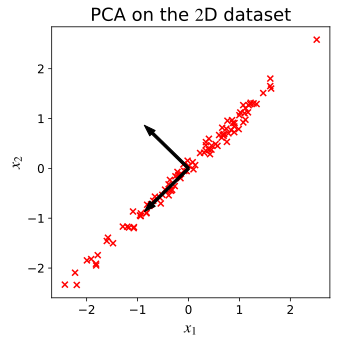

In [3]:
x = np.load('corr_data_2d.npy') # load the 2d correlated dataset

eig_values, eig_vectors = PCA(x) # perform PCA and return results

plt.figure(figsize = (5, 5))
plt.scatter(x[:, 0], x[:, 1], marker = 'x', color = 'red')
plt.arrow(0, 0, eig_vectors[0, 0], eig_vectors[0, 1], color = 'black', width = 0.05)
plt.arrow(0, 0, eig_vectors[1, 0], eig_vectors[1, 1], color = 'black', width = 0.05)
beautify_plot({"title":"PCA on the $2$D dataset", "x":"$x_1$", "y":"$x_2$"})
plt.show()

toggle_code()

PCA has picked out the orthogonal directions of maximum and minimum spread, shown by the black arrows. Let's also have a look at the corresponding eigenvalues:

In [7]:
print('Eigenvalues:', eig_values.round(2), 'Standard deviations:', (eig_values**0.5).round(2))

toggle_code()

Eigenvalues: [2.08 0.01] Standard deviations: [1.44 0.07]


The roots of the eigenvalues, $1.44, 0.07$, are the standard deviations of the dataset along the corresponding directions, and appear plausible from the plot. We can easily apply the same idea to MNIST, and plot the reconstruction error against the number of components discarded, for all images of the character $8$.

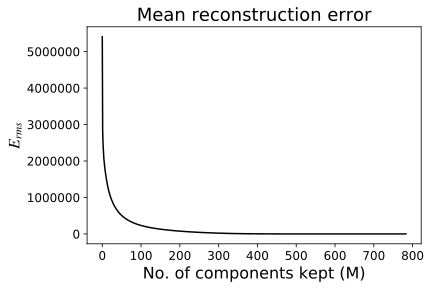

In [8]:
x = np.load('mnist_images.npy') # load the MNIST images...
y = np.load('mnist_labels.npy') # ... and labels

X = x[np.where(y == 8)] # select all images of 8s
X = X.reshape((X.shape[0], -1)) # reshape images into vectors

eig_values, eig_vectors = PCA(X) # apply PCA

plt.plot(np.arange(eig_values.shape[0]), np.cumsum(eig_values[::-1])[::-1], color = 'black')
beautify_plot({"title":"Mean reconstruction error", "x":"No. of components kept (M)", "y":"$E_{rms}$"})
plt.show()

toggle_code()

The reconstruction error appears to be dominated by a few components, whilst most components are relatively poor descriptors of the data. Let's visualise these components below:

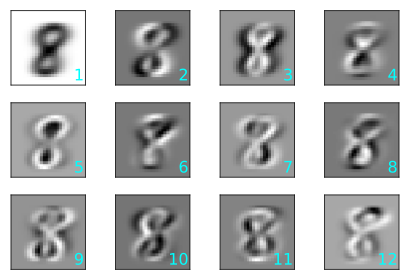

In [9]:
for i in range(12):
    
    plt.subplot(3, 4, i + 1)
    plt.imshow(eig_vectors[:, i].reshape(x.shape[1:]), cmap = 'binary')
    plt.text(27, 27, s = i + 1, color = 'cyan', fontsize = 16,
             horizontalalignment = 'right', verticalalignment = 'bottom')
    remove_axes()
    
plt.tight_layout()
plt.show()

toggle_code()

This plot shows the principal components for the images of $8$'s in the dataset, arranged by eigenvalue size. All of them display a figure of $8$ shape, with slight deformations and different pixel intensities along the figure of $8$. We can also look directly at how a certain sample is composed of such compoents, by computing the image approximation using $M$ components:

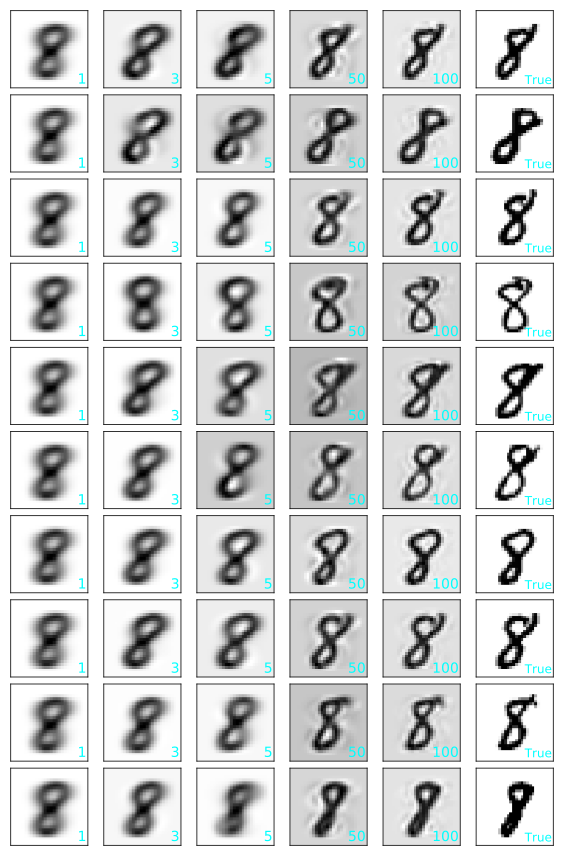

In [10]:
no_components = [1, 3, 5, 50, 100]

plt.figure(figsize = (12, 12))
for j, test_image in enumerate(X[:10]):
    for i, M in enumerate(no_components):
        inner_products = (eig_vectors.T).dot(test_image)

        weights = inner_products[:M]
        vectors = eig_vectors[:, :M]
        reconstructed_img = vectors.dot(weights)

        plt.subplot(10, 6, j*(len(no_components) + 1) + i + 1)
        plt.imshow(reconstructed_img.reshape(x.shape[1:]), cmap = 'binary')
        plt.text(27, 27, s = M, color = 'cyan', fontsize = 14,
                 horizontalalignment = 'right', verticalalignment = 'bottom')
        remove_axes()

    plt.subplot(10, 6, j*(len(no_components) + 1) + len(no_components) + 1)
    plt.imshow(test_image.reshape(x.shape[1:]), cmap = 'binary')
    plt.text(27, 27, s = 'True', color = 'cyan', fontsize = 12,
                 horizontalalignment = 'right', verticalalignment = 'bottom')
    remove_axes()

plt.tight_layout(w_pad = -25, h_pad = 0)
plt.show()

toggle_code()

As the number of components used increases, the approximate image progressively resembles the true image. Although at first sight the variability between different writings of the character $8$ might appear quite large, this example illustrates that the important degrees of freedom are much fewer than the number of dimensions in the dataset.

Having covered principal component analysis, you should now understand:
    
1. The equation for PCA and how it is derived.
2. Why reconstruction loss minimisation is equivalent to variance maximisation.

In [section 4.2](dim_red_hd.ipynb) we will look at more computationally effective ways of implementing PCA with high dimensional data.